In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
import numpy as np
import pandas as pd
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
#train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets.


import pandas_profiling as pp

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

In [3]:
df_1 = pd.read_csv("item_categories.csv",na_values ="any")
df_2 = pd.read_csv("items.csv",na_values ="any")
df_3 = pd.read_csv("sales_train.csv",na_values ="any")
df_4 = pd.read_csv("shops.csv",na_values ="any")
df_test = pd.read_csv("test.csv",na_values ="any")

In [4]:
print(df_1)
print("*-"*30)
print( 'shape of the data :',df_1.shape)

           item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
shape of the data : (84, 2)


In [5]:
print(df_2)
print("*-"*30)
print('shape of the data :',df_2.shape)

                                               item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
...                                                  ...      ...   
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165   
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166   
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167   
22168                                Яйцо для Little Inu    22168   
22169                      Яйцо дракона (Игра престолов)    22169   

       item_category_id  
0                    40  
1                    76  
2                    40  
3                    40  
4                    40  
...            

In [6]:
print(df_3)
print("*-"*30)
print('shape of the data :',df_3.shape)

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
293

In [7]:
print(df_4)
print("*-"*30)
print('shape of the data :',df_4.shape)

                                          shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                      

In [8]:
print(df_test)
print("*-"*30)
print('shape of the data :',df_test.shape)

            ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
...        ...      ...      ...
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969

[214200 rows x 3 columns]
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
shape of the data : (214200, 3)


In [9]:
df_3['date'] = pd.to_datetime(df_3['date'],format='%d.%m.%Y')

In [10]:
df_3.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [11]:
df_3["day"] = df_3["date"].dt.day
df_3["month"] = df_3["date"].dt.month
df_3["year"] = df_3["date"].dt.year

In [12]:
df_3

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  day  month  year  
0                 1.0    2      1  2013  
1                 1.0    3      1  2013  
2                -1.0    5      1  2013  
3                 1.0    6      1  2013  
4                 1.0   15      1  2013  
...               ...  ...    ...   ...  
2935844           1.0   10     10  2015  
2935845           1.0    9     10  2015  
2935846           1.0   14     10  2015  
2935847           1.0   22     10  2015  
2935848           1.0    3     10  2015  

[2935849 rows x 9 columns]

In [13]:
df_3['year'].value_counts(normalize=True)*100

2013    43.175313
2014    35.964418
2015    20.860269
Name: year, dtype: float64

In [14]:
df_3['year_to_month']=(df_3['year']-2013)*12
df_3['year_to_month']
    

0           0
1           0
2           0
3           0
4           0
           ..
2935844    24
2935845    24
2935846    24
2935847    24
2935848    24
Name: year_to_month, Length: 2935849, dtype: int64

In [15]:
df_3['allmonth']=df_3['year_to_month']+df_3['month']
df_3['allmonth']

0           1
1           1
2           1
3           1
4           1
           ..
2935844    34
2935845    34
2935846    34
2935847    34
2935848    34
Name: allmonth, Length: 2935849, dtype: int64

In [16]:
df_3['allmonth'].value_counts()

12    143246
24    130786
3     121347
1     115690
2     108613
8     104772
7     100548
6     100403
13     99349
11     96736
9      96137
10     94202
4      94109
15     92733
5      91759
14     89830
25     88522
20     86614
23     86428
18     82408
22     79361
19     78760
17     78529
16     77906
21     73157
26     71808
27     69977
32     57029
28     56274
31     55549
30     54617
29     54548
34     53514
33     50588
Name: allmonth, dtype: int64

In [17]:
df_3['month'].value_counts()

1     303561
3     284057
12    274032
2     270251
8     248415
6     237428
7     234857
4     228289
10    227077
5     224836
9     219882
11    183164
Name: month, dtype: int64

In [18]:
df_3.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
day                        int64
month                      int64
year                       int64
year_to_month              int64
allmonth                   int64
dtype: object

In [19]:
df_3.groupby(['allmonth','item_id']).sum().reset_index().sort_values(['item_price'])

allmonth  item_id  date_block_num  shop_id    item_price  \
65415          8    20142               7       21  1.000000e-01   
62139          8    11873              14       13  2.000000e-01   
62136          8    11869              21       76  3.000000e-01   
65412          8    20139              28      110  4.000000e-01   
141931        19     5499              18       22  5.000000e-01   
...          ...      ...             ...      ...           ...   
115136        15     6675            4914    10475  7.459113e+06   
107994        14     6675            5304    12275  7.736198e+06   
148829        20     6675            8835    15434  8.545061e+06   
176050        24    13443           11937    16610  1.285081e+07   
92442         12     6675            6622    18246  1.391779e+07   

        item_cnt_day    day  month     year  year_to_month  
65415            1.0      6      8     2013              0  
62139            3.0     12     16     4026              0  
62136            3.0     43     24     6039              0  
65412            7.0     78     32     8052              0  
141931           1.0     15      7     2014             12  
...              ...    ...    ...      ...            ...  
115136         654.0   6613   1053   706914           4212  
107994        1359.0   6310    816   821712           4896  
148829         589.0   7455   3720   936510           5580  
176050         969.0   8663   6228  1045266           6228  
92442         2002.0  10585   7224  1211826              0  

[233912 rows x 10 columns]

In [20]:
df_train = df_3.groupby(['allmonth', 'item_id', 'month']).sum().reset_index()
df_train = df_train.merge(df_2, on='item_id')

In [21]:
pp.ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
df_train = df_train.drop_duplicates()
df_train.shape

(233912, 12)

In [23]:
x = df_train[['allmonth', 'item_id', 'month', 'item_category_id','shop_id']]
y = df_train[['item_cnt_day']]

In [24]:
# Threshold for removing correlated variables
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix = x.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight)

In [25]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
df_train = df_train.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', df_train.shape[1])


The number of features that passed the collinearity threshold:  12


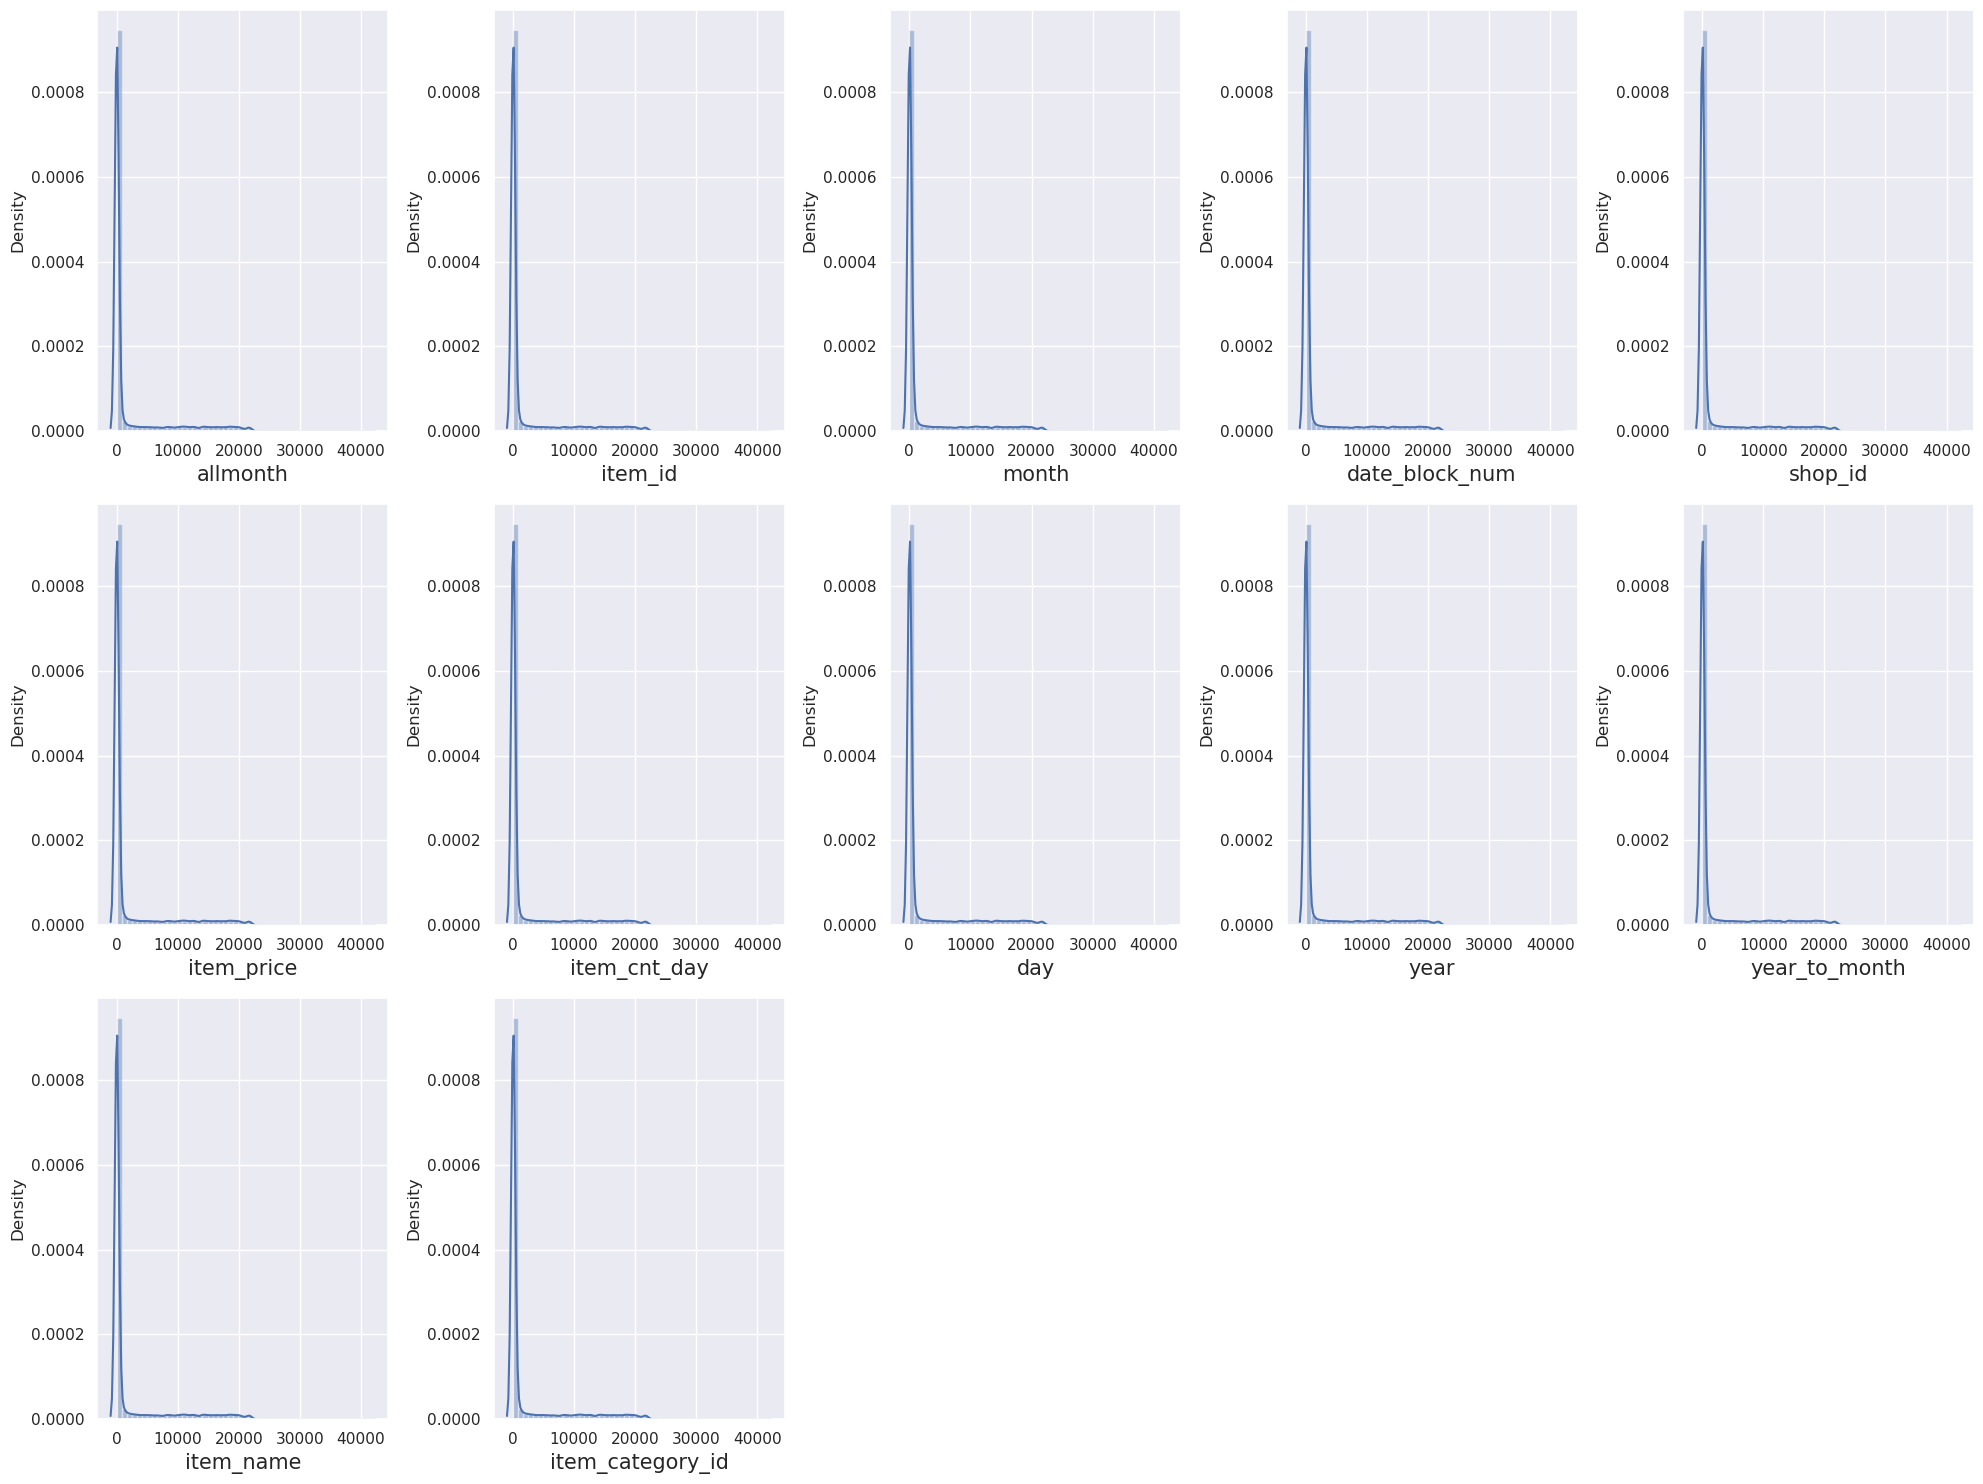

In [26]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df_train:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(x)
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=109)

In [28]:
print("X_train shape:",x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train shape: (187129, 5)
(46783, 5)
(187129, 1)
(46783, 1)


In [29]:
model = RandomForestRegressor(n_estimators=100,criterion='squared_error')
model.fit(x_train, y_train)

RandomForestRegressor()

In [30]:

rf_train_pred = model.predict(x_train)
rf_test_pred = model.predict(x_test)
model.score(x_train, y_train)
acc_random_forest_train = round(model.score(x_train, y_train) * 100)
acc_random_forest_train
acc_random_forest_test=round(model.score(x_test, y_test) * 100)
acc_random_forest_test

82

In [31]:
r2 = r2_score(y_train,rf_train_pred)
print("R^2 = ", r2)
print('--'*30)
r2 = r2_score(y_test,rf_test_pred)
print("R^2 = ", r2)

R^2 =  0.9790318795730635
------------------------------------------------------------
R^2 =  0.815273980923719


In [32]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Train:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Train:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(test_act,test_pred))

In [33]:
error_metrics(y_train,rf_train_pred,y_test,rf_test_pred)

*** Error metrics Train data ***
MAE Train: 1.116988013616275
MSE Train: 194.5763010377867
RMSE Train: 13.949060937489186
MAPE Train: 2988617487010.9956
***
 Error metrics Test Data ***
MAE Train: 2.972875403458522
MSE Train: 1677.7255970779984
RMSE Train: 40.960048792426974
MAPE Train: 8520479725938.284


TEST DATA

In [34]:
df_test

ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
...        ...      ...      ...
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969

[214200 rows x 3 columns]

In [35]:
df_test = df_test.merge(df_2[["item_id", "item_category_id"]],   on="item_id")

In [36]:
df_test = df_test.merge(df_train[["allmonth", "month","item_id"]],   on="item_id")

In [37]:
df_test

ID  shop_id  item_id  item_category_id  allmonth  month
0             0        5     5037                19        21      9
1             0        5     5037                19        22     10
2             0        5     5037                19        23     11
3             0        5     5037                19        24     12
4             0        5     5037                19        25      1
...         ...      ...      ...               ...       ...    ...
2924539  214199       45      969                37        30      6
2924540  214199       45      969                37        31      7
2924541  214199       45      969                37        32      8
2924542  214199       45      969                37        33      9
2924543  214199       45      969                37        34     10

[2924544 rows x 6 columns]

In [38]:
pd.Series(model.feature_importances_,index=x_train.columns)

allmonth            0.021772
item_id             0.024934
month               0.027920
item_category_id    0.015604
shop_id             0.909771
dtype: float64

In [39]:
df_test.dtypes

ID                  int64
shop_id             int64
item_id             int64
item_category_id    int64
allmonth            int64
month               int64
dtype: object

In [40]:
df_test.isnull().sum()

ID                  0
shop_id             0
item_id             0
item_category_id    0
allmonth            0
month               0
dtype: int64

In [41]:
df_test["item_cnt_month"]=model.predict(df_test.iloc[:,1:])

In [42]:
final_pred = df_test[["ID", "item_cnt_month"]]

In [43]:
final_pred.to_csv("submission.csv", index=False)